In [1]:
import matplotlib.pyplot as plt
from matplotlib import rc  ### 이 줄과
rc('font', family='AppleGothic') 			## 이 두 줄을 
plt.rcParams['axes.unicode_minus'] = False  ## 추가해줍니다. 

import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
df = pd.read_csv("./대전광역시 유성구_지역화폐 발급월별 소비금액 지수 데이터_20220531.csv", encoding='CP949')

In [3]:
df["발급년"]=df["발급년"].astype(str)
df["발급월"]=df["발급월"].astype(str)

In [4]:
df.head()

,발급년,발급월,광역시도코드,광역시도명,시군구코드,시군구명,법정동코드,법정동명,연령대,성별,지수_이용건수,지수_이용금액
0,2020,5,30,대전광역시,30110.0,동구,3011010200,인동,30대,여성,100.0,100.0
1,2020,5,30,대전광역시,30110.0,동구,3011010400,천동,40대,여성,100.0,100.0
2,2020,5,30,대전광역시,30110.0,동구,3011010500,가오동,30대,남성,100.0,100.0
3,2020,5,30,대전광역시,30110.0,동구,3011010500,가오동,40대,여성,100.0,100.0
4,2020,5,30,대전광역시,30110.0,동구,3011010600,신흥동,30대,남성,100.0,100.0


# 년별 카드이용금액과 카드사용건수 비교

([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

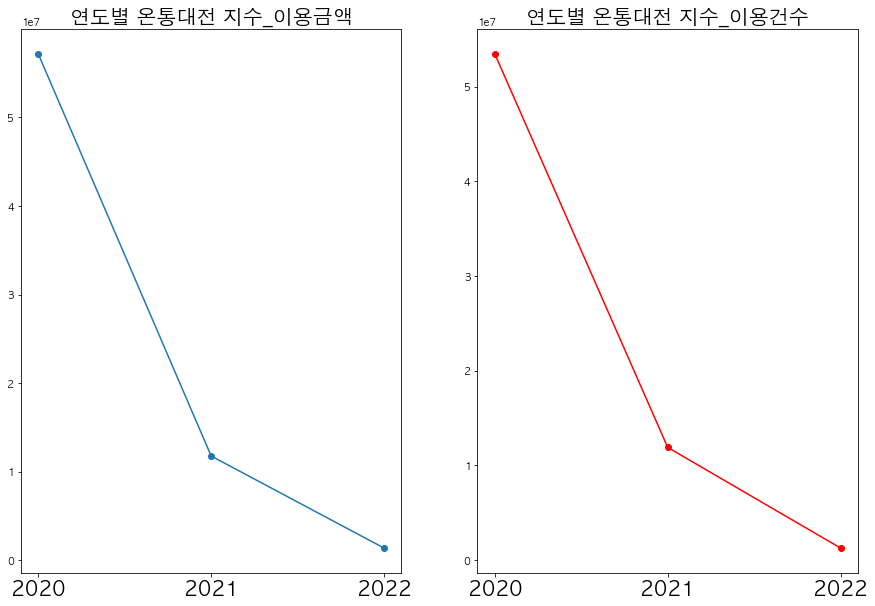

In [8]:

plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
t2 = df.groupby(by='발급년').sum()['지수_이용금액']
plt.plot(t2.index,t2,"-o")
plt.title('연도별 온통대전 지수_이용금액',fontsize=20)
plt.xticks(fontsize=20)



plt.subplot(1,2,2)
t2 = df.groupby(by='발급년').sum()['지수_이용건수']
plt.plot(t2.index,t2,"-o",color='red')
plt.title('연도별 온통대전 지수_이용건수',fontsize=20)
plt.xticks(fontsize=20)



# 월별 카드이용금액과 카드사용건수 비교 ( 월만 보고 따졌을때 , 시간 순서아님 그냥 월만 보고 따졌을 때임)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

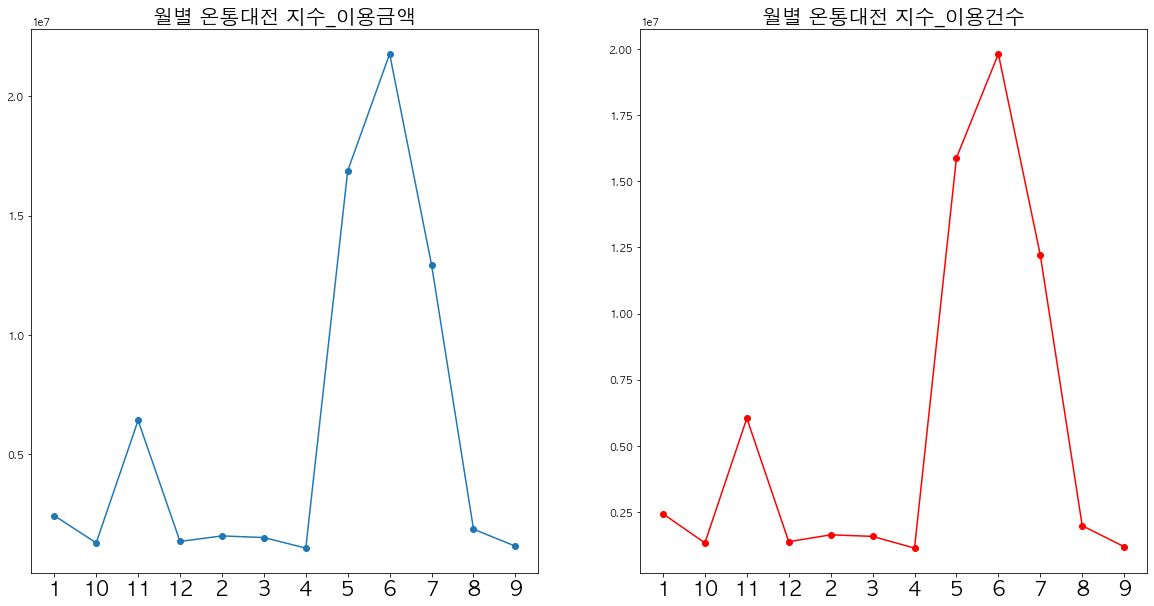

In [10]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
t2 = df.groupby(by='발급월').sum()['지수_이용금액']
plt.plot(t2.index,t2,"-o")
plt.title('월별 온통대전 지수_이용금액',fontsize=20)
plt.xticks(fontsize=20)

plt.subplot(1,2,2)
t2 = df.groupby(by='발급월').sum()['지수_이용건수']
plt.plot(t2.index,t2,"-o",color='red')
plt.title('월별 온통대전 지수_이용건수',fontsize=20)
plt.xticks(fontsize=20)

# 발급 이후 시계열

In [12]:
for i in range(2,3):
    df["발급월"+str(i)] = df["발급월"].astype('str').str.zfill(i) # 1~9월까지 0을 채워서 두 자리까지..

df["발급년월"] = df["발급년"] + df["발급월2"] #컬럼 두 개 합치기 = 2xxx0x 형태로 만들기

from datetime import datetime

df['발급년월']=df['발급년월'].apply(lambda _ : datetime.strptime(_,'%Y%m'))

(array([18353., 18444., 18536., 18628., 18718., 18809., 18901., 18993.,
        19083.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

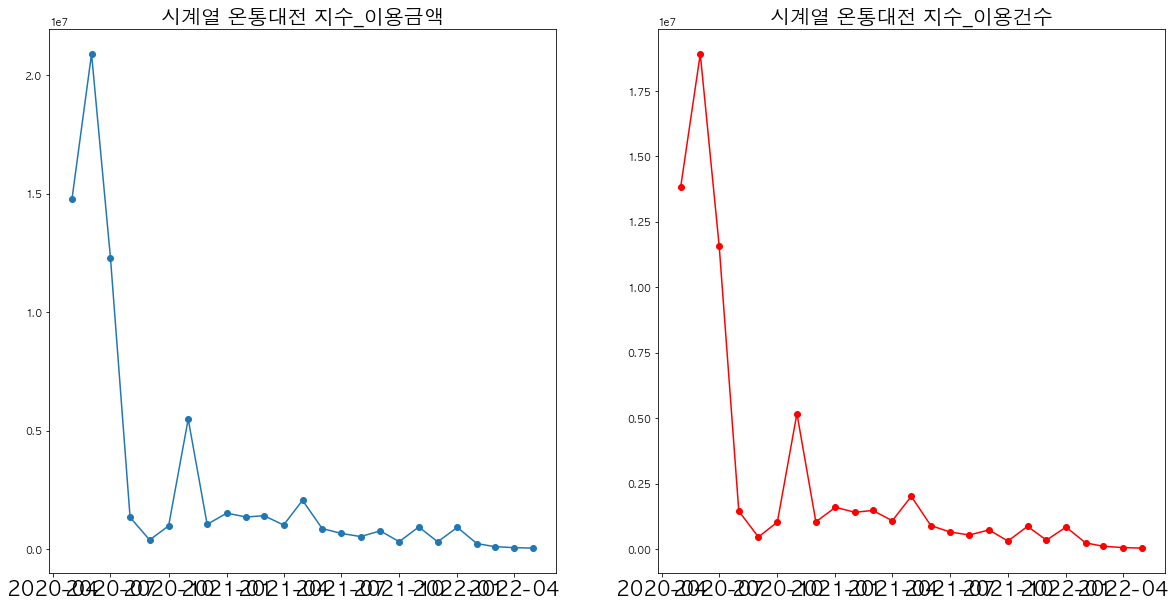

In [13]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
t2 = df.groupby(by='발급년월').sum()['지수_이용금액']
plt.plot(t2.index,t2,"-o")
plt.title('시계열 온통대전 지수_이용금액',fontsize=20)
plt.xticks(fontsize=20)

plt.subplot(1,2,2)
t2 = df.groupby(by='발급년월').sum()['지수_이용건수']
plt.plot(t2.index,t2,"-o",color='red')
plt.title('시계열 온통대전 지수_이용건수',fontsize=20)
plt.xticks(fontsize=20)